# Full scans

Here we will analyze the results of the full scans that were performed on the cluster. The scripts to run the scans in parallel on the cluster are located in the `run/` folder, also containing examples of `SLURM` batch files used to launch these scan. The file names are below. These are used to obtain the Monte Carlo chains, which are included in the repository.

Three scans are performed, floating:

- $N_D$, $z_0$ and $\beta$ (`run_nd_z0_beta.py`)
- $N_D$, $N_B$, $z_0$ and $\beta$ (`run_nd_nb_z0_beta_prior.py`)
- $N_D$, $N_B$, $z_0$, $\beta$ and $\alpha$ (`run_nd_nb_z0_beta_alpha_prior.py`)

and the likelihoods between runs including the bulge population are compared with those without it to test preference for the bulge population.

For these runs, we show:

- Best-fit log-evidence
- Best-fit parameters
- For the bulge runs, TS preference with respect to disk-only

In [22]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys,os
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../run/")
from run import run_scan

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
lge_nd_ary = []
lge_nd_nb_ary = []

Ns_ary = np.arange(200,1000,100)

for Ns in Ns_ary:

    fixed_params = ['n','sigma','alpha','Lmax_disk', 'Lmax_bulge','N_bulge']
    fixed_param_vals = [2.35,1.528,2.6,1.0e36,1.0e36,0]

    floated_params = ['N_disk', 'z0', 'beta']
    floated_param_priors = [[0,3000000],[0.01,2.0],[1.1,3.0]]

    rs_nd = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 10, share_betas=True, use_prior=True)

    chains_dir = '../run/chains/rs_nd_varyingNs_'+ str(Ns)+'/'
    lge_nd = rs_nd.get_bestfit_lge(chains_dir=chains_dir)
    
    lge_nd_ary.append(lge_nd)

    print "Best-fit log-evidence:",2*lge_nd

    fixed_params = ['n','sigma','alpha','Lmax_disk', 'Lmax_bulge']
    fixed_param_vals = [2.35,1.528,2.6,1.0e36,1.0e36]

    floated_params = ['N_bulge','N_disk','z0', 'beta']
    floated_param_priors = [[0,3000000],[0,3000000],[0.01,2.0],[1.1,3.0]]

    rs_nd_nb = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 10, share_betas=True, use_prior=True)
    chains_dir = '../run/chains/rs_nd_nb_varyingNs_'+ str(Ns)+'/'
    lge_nd_nb = rs_nd_nb.get_bestfit_lge(chains_dir=chains_dir)
    
    lge_nd_nb_ary.append(lge_nd_nb)

    print "Best-fit log-evidence:",2*lge_nd_nb

    TS = 2*(lge_nd_nb - lge_nd)
    print "TS =", TS
    print np.sqrt(TS), "sigma"

  analysing data from ../run/chains/rs_nd_varyingNs_200/.txt
Best-fit log-evidence: -576.137464556
  analysing data from ../run/chains/rs_nd_nb_varyingNs_200/.txt
Best-fit log-evidence: -568.098538357
TS = 8.03892619935
2.83530001928 sigma
  analysing data from ../run/chains/rs_nd_varyingNs_300/.txt
Best-fit log-evidence: -578.82787329
  analysing data from ../run/chains/rs_nd_nb_varyingNs_300/.txt
Best-fit log-evidence: -570.149078132
TS = 8.67879515813
2.94597949045 sigma
  analysing data from ../run/chains/rs_nd_varyingNs_400/.txt
Best-fit log-evidence: -578.245238894
  analysing data from ../run/chains/rs_nd_nb_varyingNs_400/.txt
Best-fit log-evidence: -570.119578329
TS = 8.12566056563
2.85055443127 sigma
  analysing data from ../run/chains/rs_nd_varyingNs_500/.txt
Best-fit log-evidence: -578.617747946
  analysing data from ../run/chains/rs_nd_nb_varyingNs_500/.txt
Best-fit log-evidence: -570.344015237
TS = 8.27373270959
2.87640969085 sigma
  analysing data from ../run/chains/rs_nd

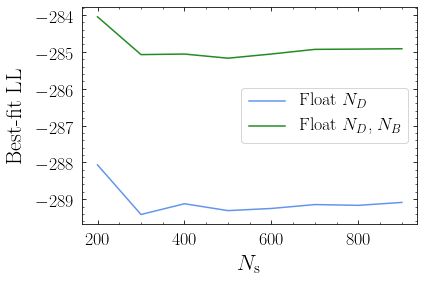

In [82]:
plt.plot(Ns_ary, np.array(lge_nd_ary), label="Float $N_D$")
plt.plot(Ns_ary, np.array(lge_nd_nb_ary), label="Float $N_D$, $N_B$")
plt.ylabel("Best-fit LL")
plt.xlabel("$N_\mathrm{s}$")
plt.legend()

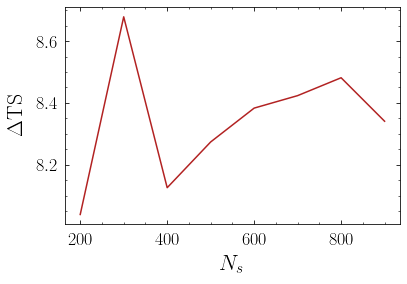

In [60]:
plt.plot(Ns_ary, 2*np.array(lge_nd_nb_ary) - 2*np.array(lge_nd_ary), color='firebrick')
plt.ylabel("$\Delta$TS")
plt.xlabel("$N_s$")
plt.legend()

In [83]:
nick = np.load("../data/efficiency_long.npy")

In [84]:
dan = np.load("../data/efficiency_long_dan.npy")

In [92]:
np.shape(dan), np.min(dan), np.max(dan)

((12, 12, 8), 0.001, 0.999)

In [98]:
np.shape(dan), np.min(dan), np.max(dan)

((12, 12, 8), 0.001, 0.999)

In [86]:
np.shape(nick), np.min(nick), np.max(nick)

((12, 12, 8), 0.011162487711731662, 1.0)

In [87]:
dan[dan > 1] = 0.999
dan[dan < 0] = 0.001

In [88]:
np.shape(dan), np.min(dan), np.max(dan)

((12, 12, 8), 0.001, 0.999)

In [89]:
np.save("../data/efficiency_long_dan_trunc.npy", dan)